In [40]:
import os
import numpy as np
import cv2

data_path = '/home/ubuntu/Notebooks/raw'

image_rows = 420
image_cols = 580


def create_train_data():

    train_data_path = os.path.join(data_path, 'train')
    images = os.listdir(train_data_path)
    #images = images[:1001]
    total = len(images) / 2

    imgs = np.ndarray((total, 1, image_rows, image_cols), dtype=np.uint8)
    imgs_mask = np.ndarray((total, 1, image_rows, image_cols), dtype=np.uint8)

    i = 0
    print('-'*30)
    print('Creating training images...')
    print('-'*30)
    for image_name in images:
        if 'mask' in image_name:
            continue
        image_mask_name = image_name.split('.')[0] + '_mask.tif'
        img = cv2.imread(os.path.join(train_data_path, image_name), cv2.IMREAD_GRAYSCALE)
        img_mask = cv2.imread(os.path.join(train_data_path, image_mask_name), cv2.IMREAD_GRAYSCALE)

        img = np.array([img])
        img_mask = np.array([img_mask])

        imgs[i] = img
        imgs_mask[i] = img_mask

        if i % 100 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')

    np.save('imgs_train.npy', imgs)
    np.save('imgs_mask_train.npy', imgs_mask)
    print('Saving to .npy files done.')


def load_train_data():
    imgs_train = np.load('imgs_train.npy')
    imgs_train = imgs_train[:1000]
    imgs_mask_train = np.load('imgs_mask_train.npy')
    imgs_mask_train = imgs_mask_train[:1000]
    return imgs_train, imgs_mask_train


def create_test_data():
    train_data_path = os.path.join(data_path, 'test')
    images = os.listdir(train_data_path)
    #images = images[:500]
    total = len(images)

    imgs = np.ndarray((total, 1, image_rows, image_cols), dtype=np.uint8)
    imgs_id = np.ndarray((total, ), dtype=np.int32)

    i = 0
    print('-'*30)
    print('Creating test images...')
    print('-'*30)
    for image_name in images:
        img_id = int(image_name.split('.')[0])
        img = cv2.imread(os.path.join(train_data_path, image_name), cv2.IMREAD_GRAYSCALE)

        img = np.array([img])

        imgs[i] = img
        imgs_id[i] = img_id

        if i % 100 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')

    np.save('imgs_test.npy', imgs)
    np.save('imgs_id_test.npy', imgs_id)
    print('Saving to .npy files done.')


def load_test_data():
    imgs_test = np.load('imgs_test.npy')
    imgs_test = imgs_test[:300]
    imgs_id = np.load('imgs_id_test.npy')
    imgs_id = imgs_id[:300]
    return imgs_test, imgs_id

if __name__ == '__main__':
    create_train_data()
    create_test_data()

/home/ubuntu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/ubuntu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


------------------------------
Creating training images...
------------------------------
Done: 0/5635.0 images
Done: 100/5635.0 images
Done: 200/5635.0 images
Done: 300/5635.0 images
Done: 400/5635.0 images
Done: 500/5635.0 images
Done: 600/5635.0 images
Done: 700/5635.0 images
Done: 800/5635.0 images
Done: 900/5635.0 images
Done: 1000/5635.0 images
Done: 1100/5635.0 images
Done: 1200/5635.0 images
Done: 1300/5635.0 images
Done: 1400/5635.0 images
Done: 1500/5635.0 images
Done: 1600/5635.0 images
Done: 1700/5635.0 images
Done: 1800/5635.0 images
Done: 1900/5635.0 images
Done: 2000/5635.0 images
Done: 2100/5635.0 images
Done: 2200/5635.0 images
Done: 2300/5635.0 images
Done: 2400/5635.0 images
Done: 2500/5635.0 images
Done: 2600/5635.0 images
Done: 2700/5635.0 images
Done: 2800/5635.0 images
Done: 2900/5635.0 images
Done: 3000/5635.0 images
Done: 3100/5635.0 images
Done: 3200/5635.0 images
Done: 3300/5635.0 images
Done: 3400/5635.0 images
Done: 3500/5635.0 images
Done: 3600/5635.0 imag

In [18]:
import os
import numpy as np
import cv2

data_path = '/home/ubuntu/Notebooks/raw'

image_rows = 420
image_cols = 580
def load_test_data():
    imgs_test = np.load('imgs_test.npy')
    imgs_test = imgs_test[:300]
    imgs_id = np.load('imgs_id_test.npy')
    imgs_id = imgs_id[:300]
    return imgs_test, imgs_id
def load_train_data():
    imgs_train = np.load('imgs_train.npy')
    imgs_train = imgs_train[:1000]
    imgs_mask_train = np.load('imgs_mask_train.npy')
    imgs_mask_train = imgs_mask_train[:1000]
    return imgs_train, imgs_mask_train

In [9]:
# Define and create the model 
from keras import optimizers
from keras.layers import Activation, Dense, Input, Convolution2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.layer_utils import print_summary

def get_unet_aug():
    
    inputs = Input((1, img_rows, img_cols))
    dropout1 = Dropout(0.25)(inputs)
    conv1 = Convolution2D(32, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(dropout1)
    conv1 = Convolution2D(32, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2),dim_ordering='th')(conv1)
    #imshow(l.activation(inpic)) 

    #dropout2 = Dropout(0.25)(pool1)
    conv2 = Convolution2D(64, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(pool1)
    conv2 = Convolution2D(64, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2),dim_ordering="th")(conv2)

    #dropout3 = Dropout(0.25)(pool2)
    conv3 = Convolution2D(128, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(pool2)
    conv3 = Convolution2D(128, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2),dim_ordering="th")(conv3)

    #dropout4 = Dropout(0.25)(pool3)
    conv4 = Convolution2D(256, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(pool3)
    conv4 = Convolution2D(256, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2),dim_ordering="th")(conv4)

    #dropout5 = Dropout(0.25)(pool4)
    conv5 = Convolution2D(512, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(pool4)
    conv5 = Convolution2D(512, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(conv5)

    up6 = merge([UpSampling2D(size=(2, 2),dim_ordering='th')(conv5), conv4], mode='concat', concat_axis=1)
    conv6 = Convolution2D(256, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(up6)
    conv6 = Convolution2D(256, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(conv6)

    up7 = merge([UpSampling2D(size=(2, 2),dim_ordering='th')(conv6), conv3], mode='concat', concat_axis=1)
    conv7 = Convolution2D(128, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(up7)
    conv7 = Convolution2D(128, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(conv7)

    up8 = merge([UpSampling2D(size=(2, 2),dim_ordering='th')(conv7), conv2], mode='concat', concat_axis=1)
    conv8 = Convolution2D(64, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(up8)
    conv8 = Convolution2D(64, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(conv8)

    up9 = merge([UpSampling2D(size=(2, 2),dim_ordering='th')(conv8), conv1], mode='concat', concat_axis=1)
    conv9 = Convolution2D(32, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(up9)
    conv9 = Convolution2D(32, 3, 3, activation='relu', border_mode='same',dim_ordering='th')(conv9)

    conv10 = Convolution2D(1, 1, 1, activation='sigmoid',dim_ordering='th')(conv9)

    model = Model(input=inputs, output=conv10)
    
    #model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss, metrics=[dice_coef])

    #model.compile(optimizer='adam', loss=dice_coef_loss, metrics=[dice_coef])
    #sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    
    #rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08)
    #model.compile(optimizer=rmsprop, loss='binary_crossentropy')
    #model.compile(optimizer=rmsprop, loss='binary_crossentropy')
    model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss, metrics=[dice_coef])
    #metrics={'outbin': 'accuracy'}
    
    #model.compile(optimizer='adam', loss='binary_crossentropy',metrics=[dice_coef])

    print_summary(model.layers)
    return model

In [ ]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import cv2
from keras import optimizers
from keras.layers import Activation, Dense, Input, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, CSVLogger
from keras.preprocessing.image import ImageDataGenerator
img_rows = 64
img_cols = 80

smooth = 1.

def preprocess(imgs):
    imgs_p = np.ndarray((imgs.shape[0], imgs.shape[1], img_rows, img_cols), dtype=np.uint8)
    for i in range(imgs.shape[0]):
        imgs_p[i, 0] = cv2.resize(imgs[i, 0], (img_cols, img_rows), interpolation=cv2.INTER_CUBIC)
    return imgs_p


#def train():
print('-'*30)
print('Loading and preprocessing train data...')
print('-'*30)
imgs_train, imgs_mask_train = load_train_data()

imgs_train = preprocess(imgs_train)
imgs_mask_train = preprocess(imgs_mask_train)

imgs_train = imgs_train.astype('float32')
mean = np.mean(imgs_train)  # mean for data centering
std = np.std(imgs_train)  # std for data normalization

imgs_train -= mean
imgs_train /= std

imgs_mask_train = imgs_mask_train.astype('float32')
imgs_mask_train /= 255.  # scale masks to [0, 1]

print('-'*30)
print('Creating and compiling model...')
print('-'*30)
model = get_unet_aug()
model_checkpoint = ModelCheckpoint('unet_augment.hdf5', monitor='loss', save_best_only=True)
csv_logger = CSVLogger('training.log')

print('-'*30)
print('Fitting model...')
print('-'*30)
#model.fit(imgs_train, imgs_mask_train, batch_size=32, nb_epoch=1, verbose=1, shuffle=True,
 #         callbacks=[model_checkpoint,csv_logger], validation_split=0.25)
datagen = ImageDataGenerator(
            rotation_range=5,
            vertical_flip=True,
            horizontal_flip=True,
            )
model.fit_generator(datagen.flow(imgs_train, imgs_mask_train, batch_size=32, shuffle=True),
           samples_per_epoch=len(imgs_train),nb_epoch=100, verbose=1,callbacks=[model_checkpoint,csv_logger])

print('-'*30)
print('Loading and preprocessing test data...')
print('-'*30)
imgs_test, imgs_id_test = load_test_data()
imgs_test = preprocess(imgs_test)

imgs_test = imgs_test.astype('float32')
imgs_test -= mean
imgs_test /= std

print('-'*30)
print('Loading saved weights...')
print('-'*30)
model.load_weights('unet_augment.hdf5')

print('-'*30)
print('Predicting masks on test data...')
print('-'*30)
imgs_mask_test = model.predict(imgs_test, verbose=1)
np.save('imgs_mask_test_augment', imgs_mask_test)


------------------------------
Loading and preprocessing train data...
------------------------------
------------------------------
Creating and compiling model...
------------------------------
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_10 (InputLayer)            (None, 1, 64, 80)     0                                            
____________________________________________________________________________________________________
dropout_9 (Dropout)              (None, 1, 64, 80)     0           input_10[0][0]                   
____________________________________________________________________________________________________
convolution2d_134 (Convolution2D)(None, 32, 64, 80)    320         dropout_9[0][0]                  
_________________________________________________________________________________________________

In [ ]:
imgs_mask_test_augment = np.load("imgs_mask_test_augment.npy")


In [16]:
from __future__ import print_function

import cv2
import numpy as np
from keras.models import Model
from keras.layers import Input, merge, Convolution2D, MaxPooling2D, UpSampling2D, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K

K.set_image_dim_ordering('tf')  # Tensor Flow dimension ordering in this code
img_rows = 64
img_cols = 80

smooth = 1.


def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

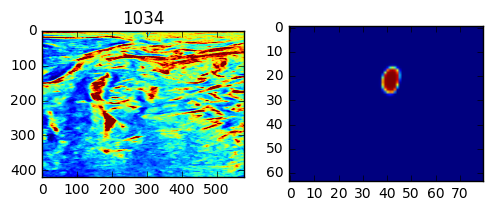

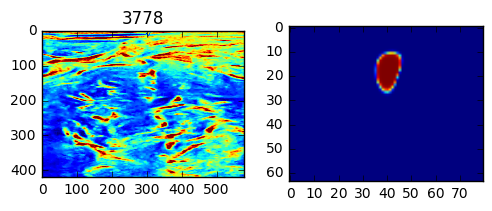

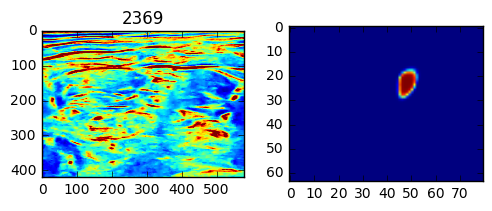

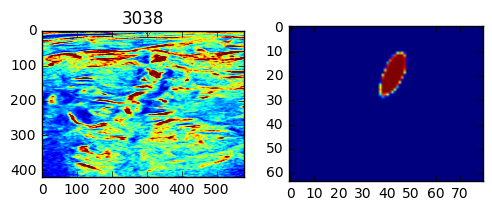

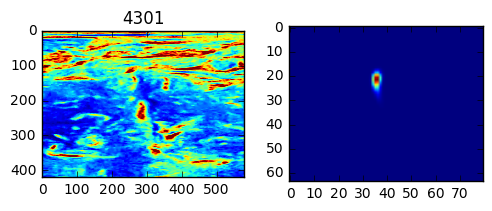

In [8]:
from matplotlib.pyplot import imshow
from matplotlib import pyplot
import numpy as np
imgs_test = np.load("imgs_test.npy")
imgs_test_id = np.load("imgs_id_test.npy")
imgs_mask_test_augment = np.load("imgs_mask_test_augment.npy")

imgs_mask_test_augment = imgs_mask_test_augment.astype('float32')

#imgs_mask_test_augment -= mean
#imgs_mask_test_augment /= std
imgs_mask_test_augment /= 255.  # scale masks to [0, 1]

import pylab as pl
for i in range(5):
    pl.figure(figsize=(12, 2))
    pl.subplot(142)
    pl.title(imgs_test_id[i])
    pl.imshow(imgs_test[i].squeeze())
    pl.subplot(143)
    pl.imshow(imgs_mask_test_augment[i].squeeze())
    pyplot.show()


In [18]:
#Validation
from matplotlib.pyplot import imshow
from matplotlib import pyplot
import cv2
from keras.layers import *
from keras.models import Model


import numpy as np
img_rows = 64
img_cols = 80


def preprocess(imgs):
    imgs_p = np.ndarray((imgs.shape[0], imgs.shape[1], img_rows, img_cols), dtype=np.uint8)
    for i in range(imgs.shape[0]):
        imgs_p[i, 0] = cv2.resize(imgs[i, 0], (img_cols, img_rows), interpolation=cv2.INTER_CUBIC)
    return imgs_p
#Create Test Set
imgs_train = np.load("imgs_train.npy")
imgs_train = imgs_train[:20]
#To validate
imgs_mask_train = np.load("imgs_mask_train.npy")
imgs__mask_train = imgs_train[:20]
#Pre process
imgs_train = preprocess(imgs_train)
imgs_mask_train = preprocess(imgs_mask_train)
#Mean for standardization
imgs_train = imgs_train.astype('float32')
mean = np.mean(imgs_train)  # mean for data centering
std = np.std(imgs_train)  # std for data normalization

imgs_train -= mean
imgs_train /= std

imgs_mask_train = imgs_mask_train.astype('float32')
imgs_mask_train /= 255.  # scale masks to [0, 1]

#Predicting on train images
print('-'*30)
print('Loading saved weights...')
print('-'*30)
model = get_unet_aug()
model.load_weights('unet_augment.hdf5')

print('-'*30)
print('Predicting masks on test data...')
print('-'*30)
imgs_mask_test = model.predict(imgs_train, verbose=1)
np.save('imgs_mask_validate_augment.npy', imgs_mask_test)

------------------------------
Loading saved weights...
------------------------------
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_8 (InputLayer)             (None, 1, 64, 80)     0                                            
____________________________________________________________________________________________________
dropout_7 (Dropout)              (None, 1, 64, 80)     0           input_8[0][0]                    
____________________________________________________________________________________________________
convolution2d_80 (Convolution2D) (None, 32, 64, 80)    320         dropout_7[0][0]                  
____________________________________________________________________________________________________
convolution2d_81 (Convolution2D) (None, 32, 64, 80)    9248        convolution2d_80[0][0]           
____

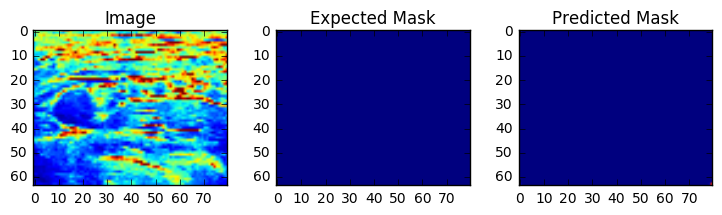

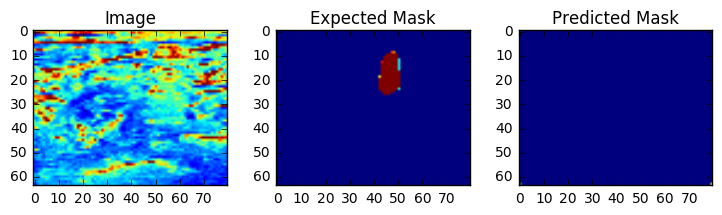

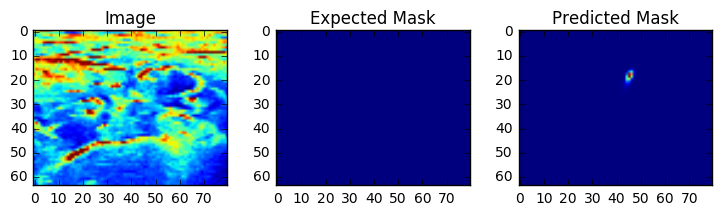

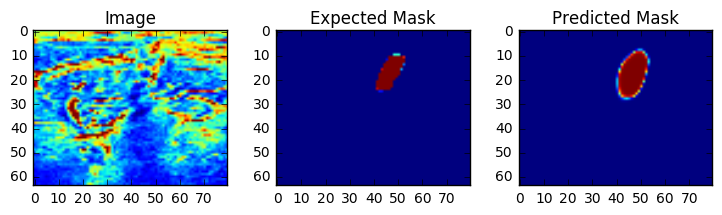

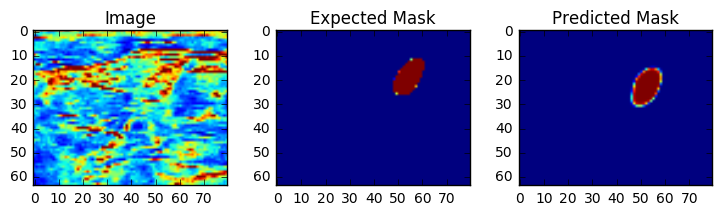

In [19]:
import pylab as pl
import numpy as np
imgs_valid_mask = np.load("imgs_mask_validate_augment.npy")
for i in range(5):
    pl.figure(figsize=(12, 2))
    pl.subplot(142)
    pl.title("Image")
    pl.imshow(imgs_train[i].squeeze())
    pl.subplot(143)
    pl.title("Expected Mask")
    pl.imshow(imgs_mask_train[i].squeeze())
    pl.subplot(144)
    pl.title("Predicted Mask")
    pl.imshow(imgs_valid_mask[i].squeeze())
    pyplot.show()